In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('amazon.csv')

In [3]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [4]:
df = df.drop_duplicates(subset = ['product_id'])

In [5]:
print(df[['product_id', 'product_link']][df.duplicated(subset = 'product_id') == True])

Empty DataFrame
Columns: [product_id, product_link]
Index: []


In [6]:
print(df.shape)

(1351, 16)


In [7]:
print(df.product_id.nunique())

1351


In [8]:
print(df.product_link.nunique())

1351


In [9]:
print(df.user_id.nunique())

1186


In [10]:
print(df.user_id[0])

AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ


In [11]:
print(df.category.nunique())

211


In [12]:
print(df.category.value_counts(normalize=True).head())

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    0.119171
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                 0.050333
Electronics|WearableTechnology|SmartWatches                                          0.045892
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                        0.044412
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                         0.037750
Name: proportion, dtype: float64


In [13]:
print(df.isna().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [14]:
print(df[df.rating_count.isna()])

     product_id                                       product_name  \
282  B0B94JPY2N  Amazon Brand - Solimo 65W Fast Charging Braide...   
324  B0BQRJ3C47  REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   

                                              category discounted_price  \
282  Computers&Accessories|Accessories&Peripherals|...             ₹199   
324  Computers&Accessories|Accessories&Peripherals|...             ₹249   

    actual_price discount_percentage rating rating_count  \
282         ₹999                 80%    3.0          NaN   
324         ₹999                 75%    5.0          NaN   

                                         about_product  \
282  USB C to C Cable: This cable has type C connec...   
324  💎[The Fastest Charge] - This iPhone USB C cabl...   

                          user_id    user_name      review_id  \
282  AE7CFHY23VAJT2FI4NZKKP6GS2UQ       Pranav   RUB7U91HVZ30   
324  AGJC5O5H5BBXWUV7WRIEIOOR3TVQ  Abdul Gafur  RQXD5SAMMPC6L   

           

In [15]:
#There's two missing values in the rating_count column (n° of user who left a rating for the product), the simplest solution is simply discarding the two rows. 

df = df.dropna()

In [16]:
print(df.isna().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [17]:
print(df.dtypes)
#Each column is of type object including the numerical variables, this needs to be fixed

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [ ]:
print(df.rating[df.rating == '|'])
df.rating.loc[1279] = 0
print(df.rating[1279])

In [19]:
df.rating = df.rating.astype(float)
print(df.rating.dtype)

float64


In [ ]:
df.rating.loc[1279] = df.rating.median()
print(df.rating[1279])

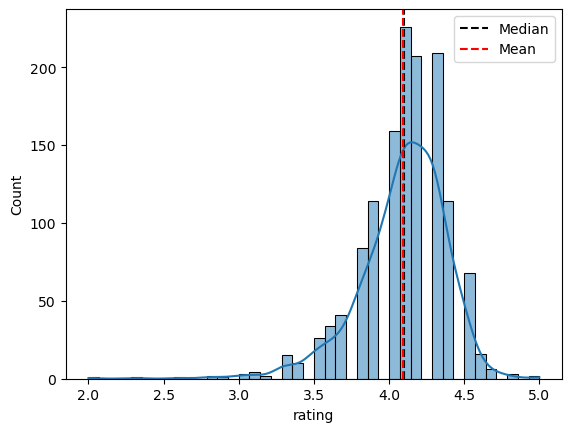

Shapiro p-val: 3.1987801368036147e-25


In [21]:
sns.histplot(df.rating, kde = True)
plt.axvline(x = df.rating.median(), color = 'k', linestyle = '--', label = 'Median')
plt.axvline(x = df.rating.mean(), color = 'r', linestyle = '--', label = 'Mean')
plt.legend()
plt.show()
plt.close()
shapiro_test = stats.shapiro(df.rating)
print(f'Shapiro p-val: {shapiro_test.pvalue}') #This tells us that the distribution is not normal

In [22]:
print(df.category.iloc[282])

Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions


In [23]:
#The category variable contains 211 unique values. Yet the category is a long string containing progressively smaller and more specific categories. Let's get the main ones

print(df.category[0].split('|')[0])

df['main_cat'] = df.category.map(lambda x : x.split('|')[0])
print(df[['product_name', 'category', 'main_cat']].head())

Computers&Accessories
                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category               main_cat  
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  
4  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories  


In [24]:
print(df.main_cat.nunique())
print(df.main_cat.value_counts(normalize=True))

9
main_cat
Electronics              0.363232
Home&Kitchen             0.332098
Computers&Accessories    0.276501
OfficeProducts           0.022980
MusicalInstruments       0.001483
HomeImprovement          0.001483
Toys&Games               0.000741
Car&Motorbike            0.000741
Health&PersonalCare      0.000741
Name: proportion, dtype: float64


In [25]:
#The price columns have a coin symbol at the beginning which needs to be removed before it can be converted to float 
print(df.discounted_price[0][1:])
df.discounted_price = df.discounted_price.map(lambda x : x[1:])
print(df.discounted_price.head())

df.actual_price = df.actual_price.map(lambda x : x[1:])
print(df.actual_price.head())

399
0    399
1    199
2    199
3    329
4    154
Name: discounted_price, dtype: object
Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link, main_cat]
Index: []
0    1,099
1      349
2    1,899
3      699
4      399
Name: actual_price, dtype: object


In [56]:
df.discounted_price = df.discounted_price.map(lambda x : x.replace(',', '')) 
df.discounted_price = df.discounted_price.astype(float)

In [58]:
df.actual_price = df.actual_price.map(lambda x : x.replace(',', '')) 
df.actual_price = df.actual_price.astype(float)

In [63]:
df.rating_count = df.rating_count.map(lambda x: x.replace(',', ''))
df.rating_count = df.rating_count.astype(float)

In [67]:
df.discount_percentage = df.discount_percentage.map(lambda x: x.replace('%',''))
print(df.discount_percentage.head())
df.discount_percentage = df.discount_percentage.astype(float)

0    64
1    43
2    90
3    53
4    61
Name: discount_percentage, dtype: object


In [69]:
print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
main_cat                object
dtype: object


In [114]:
print(df[['main_cat', 'actual_price']].sort_values(by = 'actual_price', ascending=False))

                   main_cat  actual_price
249             Electronics      139900.0
255             Electronics       85000.0
283             Electronics       79990.0
1354           Home&Kitchen       75990.0
568             Electronics       74999.0
...                     ...           ...
811          OfficeProducts          75.0
710   Computers&Accessories          59.0
616          OfficeProducts          50.0
975   Computers&Accessories          39.0
997   Computers&Accessories          39.0

[1349 rows x 2 columns]


In [188]:
print(df.groupby('main_cat')['actual_price'].mean().sort_values(ascending = False))

main_cat
Electronics              10418.083673
Home&Kitchen              4162.073661
Car&Motorbike             4000.000000
Health&PersonalCare       1900.000000
Computers&Accessories     1862.350188
MusicalInstruments        1347.000000
HomeImprovement            799.000000
OfficeProducts             397.193548
Toys&Games                 150.000000
Name: actual_price, dtype: float64


In [241]:
print(df.groupby('main_cat')['actual_price'].sum().sort_values(ascending = False))

main_cat
Electronics              5104861.00
Home&Kitchen             1864609.00
Computers&Accessories     694656.62
OfficeProducts             12313.00
Car&Motorbike               4000.00
MusicalInstruments          2694.00
Health&PersonalCare         1900.00
HomeImprovement             1598.00
Toys&Games                   150.00
Name: actual_price, dtype: float64


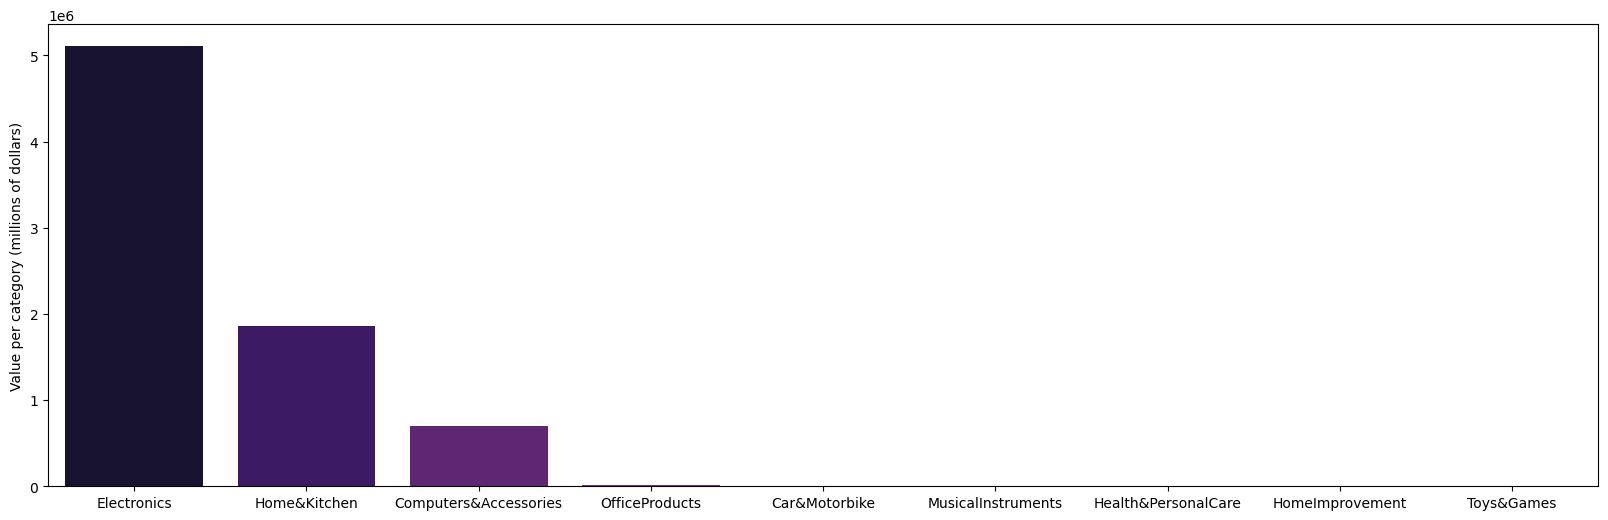

In [266]:
plt.figure(figsize=(20,6))
category_order = df.groupby('main_cat')['actual_price'].sum().sort_values(ascending = False).reset_index()
sns.barplot(x = 'main_cat', y = 'actual_price', data = category_order, hue = 'main_cat', palette = 'magma')
plt.xlabel('')
plt.ylabel('Value per category (millions of dollars)')
plt.show()
plt.close()

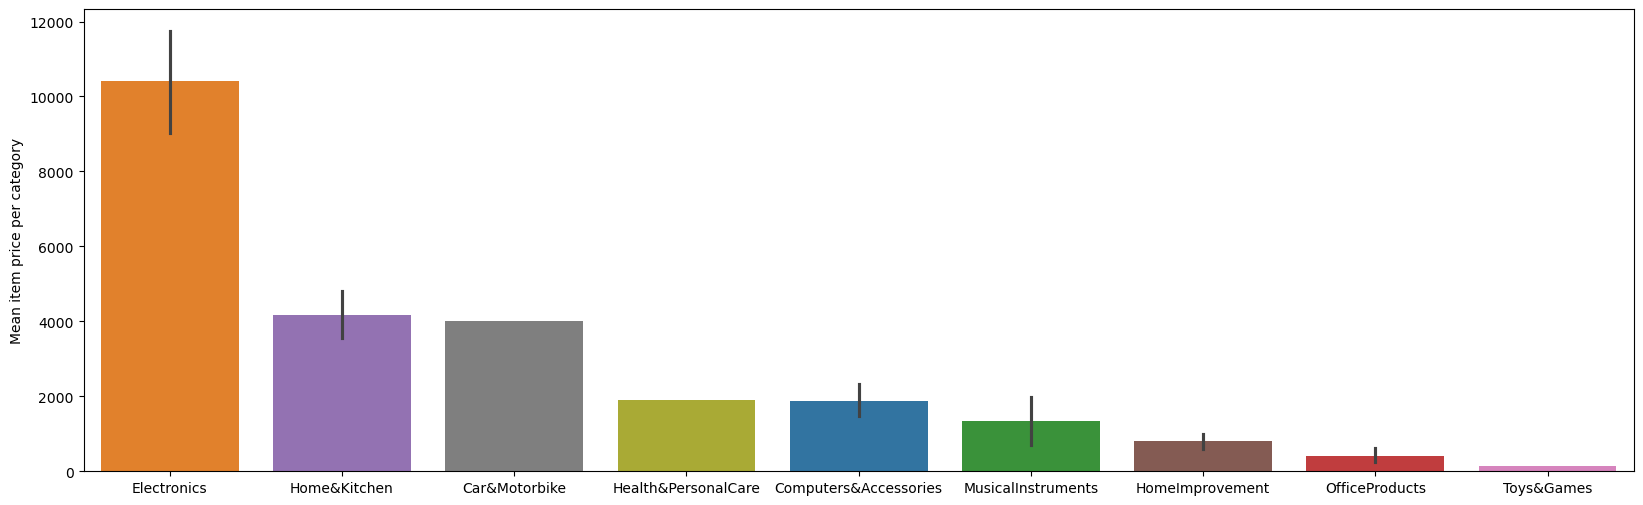

In [192]:
plt.figure(figsize=(20,6))
category_order = df.groupby('main_cat')['actual_price'].mean().sort_values(ascending=False).index
sns.barplot(y = df.actual_price, x = df.main_cat, hue = df.main_cat, order = category_order)
plt.xlabel('')
plt.ylabel('Mean item price per category')
plt.show()
plt.close()

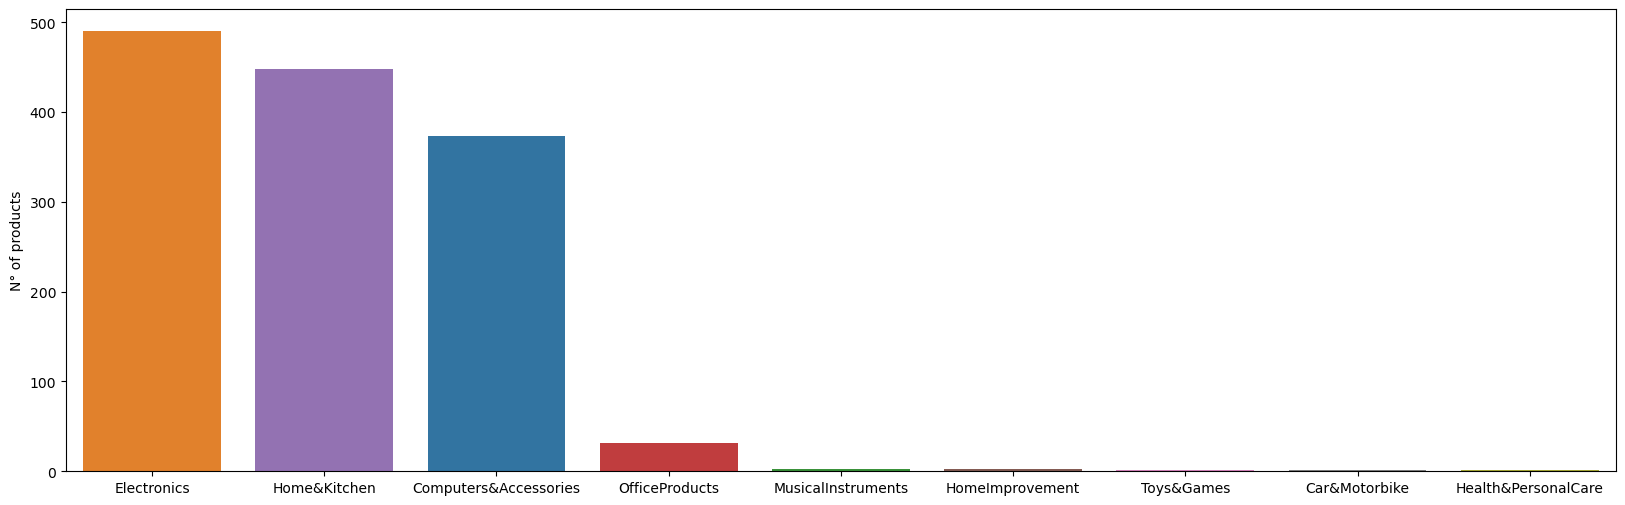

In [176]:
plt.figure(figsize=(20, 6))
cat_order = df.main_cat.value_counts()
sns.countplot(x = df.main_cat, hue = df.main_cat, order = cat_order.index)
plt.xlabel('')
plt.ylabel('N° of products')
plt.show()
plt.close()